# Ryan Tschritter

## Revised Research question/interests

1. **Find the most significantly correlated statistics (and their respective p-values) and assemble them into a scoring model by weight that can predict a players contribution to their team in the next season**

This would have two heatmaps for the correlation and p-values and using a correlation of above 0.5 and a p-value below 0.5 I should be able to then assemble a weighted model that uses higher correlated values to predict a players performance.

2. **Perform the same analysis above but generate a model that shows a player in on the decline**

## Analysis Plan

1. Generate correlation matrix for all columns of data
2. Generate a p-value matrix for the correlation matrix
3. Remove the correlations that have a value below 0.5
4. Remove the p-values above 0.5
6. Create a weighted model using the final correlated statistics for both positive contribution and negative
8. Run the original data though the model and show that it predicts performance corretly

## Analysis Pipeline
---

In [100]:
# Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
#Import Cleaned Data
nhl2017 = pd.read_csv('../data/processed/clean2017.csv')
nhl2018 = pd.read_csv('../data/processed/clean2018.csv')

In [102]:
# Import Merged Dataset with sufixes
nhlMerged = pd.read_csv('../data/processed/merged.csv')

In [103]:
# View the shape of the dataframes (ie. the number of columns and rows)
fstring1 = f"The shape of the 2017 dataframe is {nhl2017.shape}."
fstring2 = f"The shape of the 2018 dataframe is {nhl2018.shape}."
fstring3 = f"The shape of the merged dataframe is {nhlMerged.shape}."
print(fstring1)
print(fstring2)
print(fstring3)

The shape of the 2017 dataframe is (225, 19).
The shape of the 2018 dataframe is (225, 19).
The shape of the merged dataframe is (225, 37).


In [104]:
# Check to make sure the 2017 names match the 2018 names
print(nhl2017['Name'].equals(nhl2018['Name']))
print(nhlMerged['Name'].equals(nhl2018['Name']))

True
True


In [105]:
# Python dictionary for column titles
legend = {
    'Rk':'Rank In List', # The order when the data was exported from the website
    'GP':'Games Played', # The number of games played in the season
    'G':'Goals Scored', # The total number of goals scored in the season
    'A':'Assists', # The number of assists in the season
    'P':'Points', # Goals plus assists equals points
    'Pim':'Penalty Minutes', # Total number of minutes spent in the penalty box
    '+/-':'Plus Minus', # Tracks difference in goals scored when on ice, plus one when a goal is scored, minus one when a opposing team scores
    'TOI':'Average Time on Ice', # The average time on ice per game
    'PPG':'Power-Play Goals', # Number of goals score by a player when team has a power play
    'GWG':'Game-Winning Goals', # The player that scored the final goal of the game (total cumulative)
    'PPP':'Power-Play Points', # Players own power play points, positively correlated with power play goals and power play assists
    'G/GP':'Goals Per Game Played', # Goals per game played accounts for players that haven't played every game
    'A/GP':'Assists Per Game Played', # Assists per game played accounts for players that haven't played every game
    'P/GP':'Points Per Game Played', # Points per game played accounts for players that haven't played every game
    'SHOTS':'Shots On Goal', # Number of attempted shots on goal
    'SH%':'Shot Percentage', # Percent of shots that are goals
    'HITS':'Hits', # Number of body checks performed on the opposing team puck carrier
    'BS':'Blocked Shots' # Number of shots blocked by a player
}

# Exploratory Data Analysis
---

In [106]:
nhl2017.head(3)

,Rk,Name,GP,G,A,P,PIM,+/-,TOI,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS
0,185,Aaron Ekblad,82,16,22,38,71,9,23:22,5,4,11,0.195,0.268,0.463,189,8.50%,69,121
1,115,Adam Henrique,81,24,26,50,20,11,17:46,6,8,13,0.296,0.321,0.617,151,15.90%,61,61
2,193,Adrian Kempe,81,16,21,37,49,11,13:19,1,3,5,0.198,0.259,0.457,119,13.50%,91,18


In [107]:
nhlMerged.head(3)

,Name,Rk_2017,GP_2017,G_2017,A_2017,P_2017,PIM_2017,+/-_2017,TOI_2017,PPG_2017,...,PPG_2018,GWG_2018,PPP_2018,G/GP_2018,A/GP_2018,P/GP_2018,SHOTS_2018,SH%_2018,HITS_2018,BS_2018
0,Aaron Ekblad,185.0,82.0,16.0,22.0,38.0,71.0,9.0,1402.0,5.0,...,5.0,1.0,10.0,0.159,0.293,0.451,180.0,7.2,114.0,88.0
1,Adam Henrique,115.0,81.0,24.0,26.0,50.0,20.0,11.0,1066.0,6.0,...,8.0,3.0,13.0,0.220,0.293,0.512,122.0,14.8,78.0,71.0
2,Adrian Kempe,193.0,81.0,16.0,21.0,37.0,49.0,11.0,799.0,1.0,...,0.0,2.0,4.0,0.148,0.198,0.346,118.0,10.2,86.0,21.0


In [108]:
# nhlMerged.describe().T
# Hiding output to reduce file length

### Comments about the dataframe describe and analysis pipeline

- Some of the mean statistics for 2017 and 2018 are very close, such as the time on ice (TOI)
- When averages and data is simmilar between seasons like this, other analysis methods such as standard deviation become more important

[Text(0.5, 1.0, '2018 Season'),
 Text(0.5, 0, 'Average Time on Ice (min)'),
 Text(0, 0.5, '')]

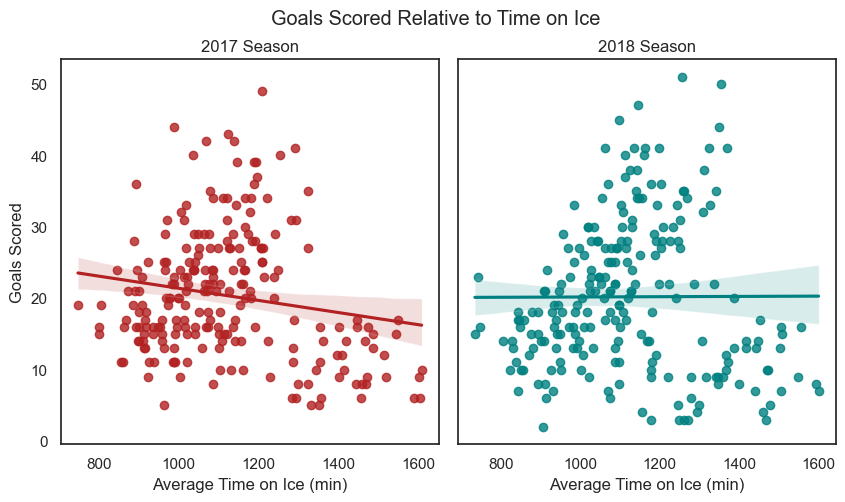

In [109]:
# Plot 1 
sns.set(style = "white")
plot1, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
plot1.suptitle('Goals Scored Relative to Time on Ice')
plot1.subplots_adjust(wspace=0.05)
sns.regplot(ax=axes[0], data = nhlMerged, x = "TOI_2017", y = "G_2017", color = "firebrick")
sns.regplot(ax=axes[1], data = nhlMerged, x = "TOI_2018", y = "G_2018", color = "teal")
axes[0].set(title='2017 Season', xlabel=legend['TOI']+' (min)', ylabel=legend['G'])
axes[1].set(title='2018 Season', xlabel=legend['TOI']+' (min)', ylabel='')

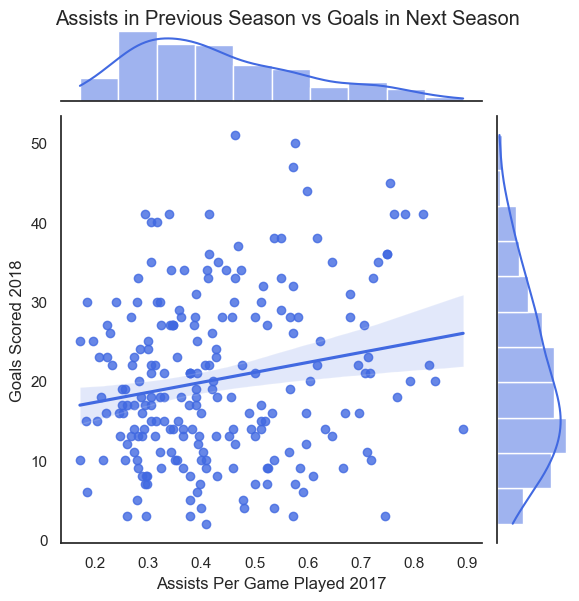

In [110]:
# Plot 2
plot2 = sns.jointplot(data=nhlMerged, x = "A/GP_2017", y = "G_2018", kind = "reg", color = "royalblue")
plot2.set_axis_labels(xlabel=legend['A/GP']+' 2017', ylabel=legend['G']+' 2018')
plt.suptitle('Assists in Previous Season vs Goals in Next Season', y=1)
sns.set(font_scale=1)

In [111]:
# Plot 3
plt.figure(figsize = (16,9))
sns.set_context('paper', font_scale=0.7)
nhlmerged_matrix = nhlMerged.corr()
print(nhlmerged_matrix)
#sns.heatmap(nhlmerged_matrix, annot=True, cmap='Blues')

             Rk_2017   GP_2017    G_2017    A_2017    P_2017  PIM_2017  \
Rk_2017     1.000000 -0.243240 -0.676647 -0.809174 -0.948827 -0.066360   
GP_2017    -0.243240  1.000000  0.174670  0.192270  0.232710  0.145043   
G_2017     -0.676647  0.174670  1.000000  0.241677  0.700274 -0.003883   
A_2017     -0.809174  0.192270  0.241677  1.000000  0.861953  0.118014   
P_2017     -0.948827  0.232710  0.700274  0.861953  1.000000  0.084792   
PIM_2017   -0.066360  0.145043 -0.003883  0.118014  0.084792  1.000000   
+/-_2017   -0.255327 -0.101942  0.232567  0.221966  0.284807  0.050981   
TOI_2017   -0.255917 -0.019563 -0.172667  0.472832  0.257640  0.129265   
PPG_2017   -0.520932  0.066578  0.717785  0.201104  0.522974  0.008236   
GWG_2017   -0.449612  0.160602  0.600402  0.216372  0.472876 -0.025495   
PPP_2017   -0.728286  0.143760  0.400292  0.762291  0.769947  0.111777   
G/GP_2017  -0.635317 -0.043846  0.972447  0.199296  0.654699 -0.036170   
A/GP_2017  -0.759504 -0.071144  0.1957

C:\Users\Ryan\AppData\Local\Temp\ipykernel_16328\1004813498.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  nhlmerged_matrix = nhlMerged.corr()


<Figure size 1600x900 with 0 Axes>

## Some notes about Visualizations

- Was expecting a positive correlation between time on ice and goals score but there wasn't, possibly even a negative correlation
- There is a slight trend with the assists in the previous season leading to more goals in the next season
- The corelation matrix shows how the statistics are corelated with eachother, this partially anwsers one my research questions

# Data Analysis
---